In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
np.random.seed(42)
n = 1000

In [ ]:
weather = np.random.choice(['Sunny', 'Rain', 'Cloudy'], size=n, p=[0.5, 0.25, 0.25])

In [ ]:
labels = np.where(weather == 'Sunny', 'Go Out', 'Stay In')

In [ ]:
df = pd.DataFrame({'weather': weather, 'label': labels})
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1000, 2)
  weather    label
0   Sunny   Go Out
1  Cloudy  Stay In
2    Rain  Stay In
3    Rain  Stay In
4   Sunny   Go Out


In [ ]:
X = pd.get_dummies(df[['weather']], drop_first=True)  # Rain, Sunny (Cloudy baseline)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("\nAccuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[105   0]
 [  0  95]]


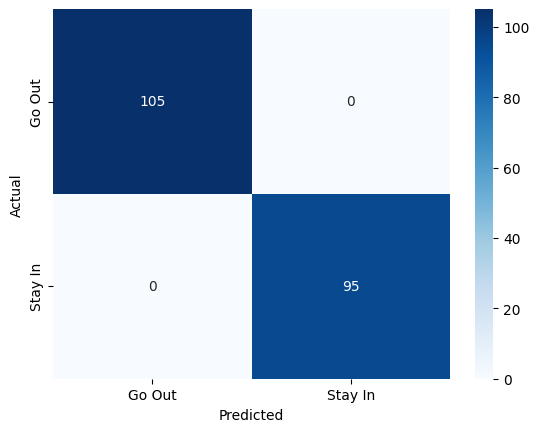

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.show()


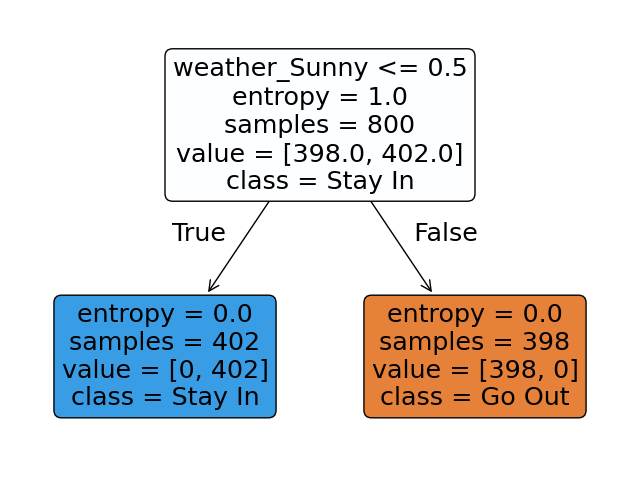

In [ ]:
plt.figure(figsize=(8,6))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()
